**кластеризация методом k-means**

Евгений Борисов borisov.e@solarl.ru

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import ConvexHull

from sklearn.datasets import make_blobs
from time import time

def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

---

In [2]:
n_samples = 500
n_clst = 3 # количество кластеров

X,_ = make_blobs( 
        n_samples=n_samples,
        centers=n_clst,  
        random_state=get_seed(),
        cluster_std=[1.0, 2.5, 0.5]
    )

---

In [3]:
# инициализация параметров
mu = np.random.rand(n_clst,X.shape[1]) * np.max(X,axis=0) * 0.95

In [4]:
# размер картинки
plot_frame = np.vstack( [ X.min(axis=0),X.max(axis=0) ]) + np.array([ [ -1.0,-1.0], [ 1.0,1.0] ] )*0.5
plot_size = (5,5)

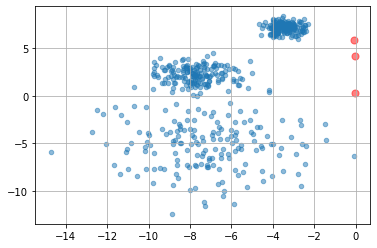

In [5]:
# рисуем начальное состояние
# plt.figure(figsize=[7,7])
# plt.xlim(plot_frame[:,0])
# plt.ylim(plot_frame[:,1])
# plt.gcf().set_size_inches(plot_size)
plt.scatter( X[:,0], X[:,1],s=20, alpha=0.5)
plt.scatter( mu[:,0], mu[:,1],s=50, alpha=0.5,c='r')
plt.grid()
# plt.savefig('res-k-means-1.png')
plt.show()

---

In [6]:
max_iter=100
max_delta_mu = 1e-10

for i in range(max_iter):
    # расстояния от центроидов до всех точек 
    R = euclidean_distances(mu,X) 
    # номера кластеров (ближайших центроидов) всех для точек
    y = np.argmin(R,axis=0) 

    # разбираем точки на кластеры
    Xc = [ X[(y==j),:] for j in range(n_clst) ]
    # дополняем пустые кластеры их центройдами
    Xc = [ c if c.size>0 else mu[i,:].reshape(1,2) for i,c in enumerate(Xc) ]

    mu_old = mu # сохраняем старое состояние

    # пересчитываем центроиды
    mu = np.vstack( [ c.mean(axis=0) for c in Xc ] )

    # проверяем изменение центроидов
    if np.square(mu_old-mu).sum() < max_delta_mu: break

---

In [7]:
# оценка результата

# расстояния от центроидов до всех точек 
R = euclidean_distances(mu,X) 
# номера кластеров (ближайших центроидов) всех для точек
y = np.argmin(R,axis=0) 

# разбираем номера точек по кластерам
C = [ [ i for i,_ in enumerate(X) if y[i]==c ] for c in set(y)  ]

# средние внутрикластерные расстояния
rmi = np.array([ euclidean_distances(X[ci,:]).mean()*0.5 for ci in C ])

# списки номеров точек чужих кластеров для каждого кластера
Cn = [ list(set(sum(C,[]))-set(ci)) for ci in C ]
# средние межкластерные расстояния (растояния до точек чужих кластеров)
rmo = np.array([ euclidean_distances(X[ci,:],X[cni,:]).mean() for ci,cni in zip(C,Cn) ])

# отношение внутрикластерного и межкластерного расстояний
(rmi/rmo).mean()*len(C)

0.38044684368057824

0 [-3.43456568  7.16576308] 166
1 [-7.78130972  1.89869418] 185
2 [-7.0324849  -5.76950805] 149


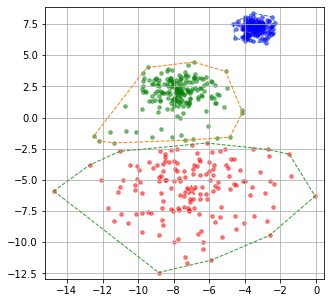

In [8]:
# print ( clust_qual(X,mu),'\n' )

R = euclidean_distances(mu,X) 
y = np.argmin(R,axis=0)     
Xc = [ X[(y==j),:] for j in range(n_clst) ]

plt.xlim(plot_frame[:,0])
plt.ylim(plot_frame[:,1])
plt.gcf().set_size_inches(plot_size)
plt.grid()

colors = [ 'b', 'g', 'r', 'c', 'm', 'y', 'k' ]

for j in range(mu.shape[0]):

    if(Xc[j].shape[0]>0):
        plt.scatter( mu[j,0], mu[j,1], marker='*',color=colors[j], s=120, alpha=0.5 )
        plt.scatter( Xc[j][:,0],  Xc[j][:,1], marker='.', color=colors[j], s=50, alpha=0.5 )
        print(j, mu[j,:],  Xc[j].shape[0] )

        
    if( Xc[j].shape[0]>2):    
        hull = ConvexHull( Xc[j])
        v = np.append( hull.vertices, hull.vertices[0] )
        plt.plot(  Xc[j][v,0],  Xc[j][v,1], '--', lw=1)

#plt.savefig('res-k-means-2.png')

plt.show()
